**1. Perform Dataset overview , Uni-variate & Bi- variate analysis with charts.**

In [55]:
import pandas as pd 
df = pd.read_csv("/content/insurance_claims_data.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [2]:
print(df.columns)
print(df.shape)

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')
(63326, 11)


In [7]:
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [3]:
df[df._get_numeric_data().columns].head()

,Duration,Net Sales,Commision (in value),Age
0,186,-29.0,9.57,81
1,186,-29.0,9.57,71
2,65,-49.5,29.70,32
3,60,-39.6,23.76,32
4,79,-19.8,11.88,41


In [4]:
#Continous Variables
a = df._get_numeric_data().columns
for i in a:
  print(str(i) +' : '+str(len(df[i].unique())))

Duration : 455
Net Sales : 1139
Commision (in value) : 1035
Age : 89


In [9]:
#Categorical Variables
b = list(set(df.columns) - set(a))
b

['Gender',
 'Agency Type',
 'Claim',
 'Product Name',
 'Agency',
 'Destination',
 'Distribution Channel']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadf8748c88>,
      dtype=object)

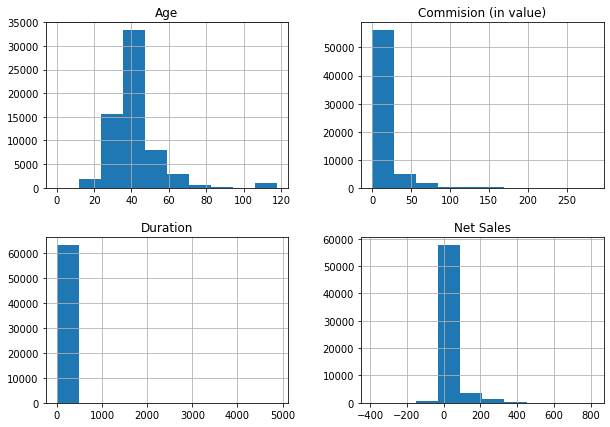

In [13]:
#Continous Univariate Analysis
import matplotlib.pyplot as plt
df.hist(figsize=[10,7])

**INFERENCES OF ABOVE GRAPHS:**

1. Age graph shows that the age of the people between 35-45 have more insurance.
2. Commission(in value) graph shows that there are more peoples whose commission lies between 0-25.
3. Duration graph shows that duration of travel for all cases lies between 1-500.
4. Net sales graph shows that the net sales of most of the agencies lies between 10-100 

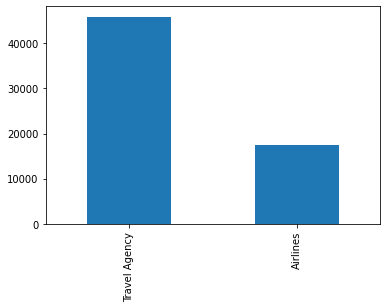

In [14]:
#Categorical Univariate Analysis
df['Agency Type'].value_counts().plot.bar()

**INFERENCES:**
Travel agencies apply maximum claims as compared to Airlines agencies.

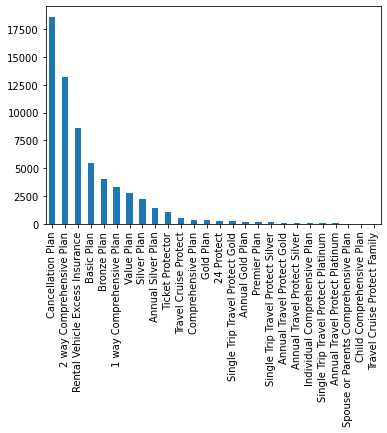

In [ ]:
df['Product Name'].value_counts().plot.bar()

**INFERENCES:**
The product "Cancellation Plan" has more no. of instances.


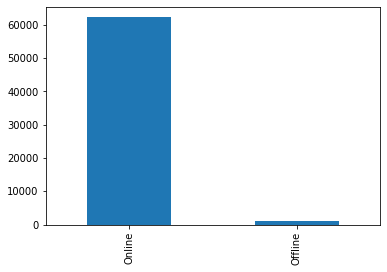

In [ ]:
df['Distribution Channel'].value_counts().plot.bar()

**INFERENCES:**
There are most of the online distribution channel and least of the offline distribution channel.

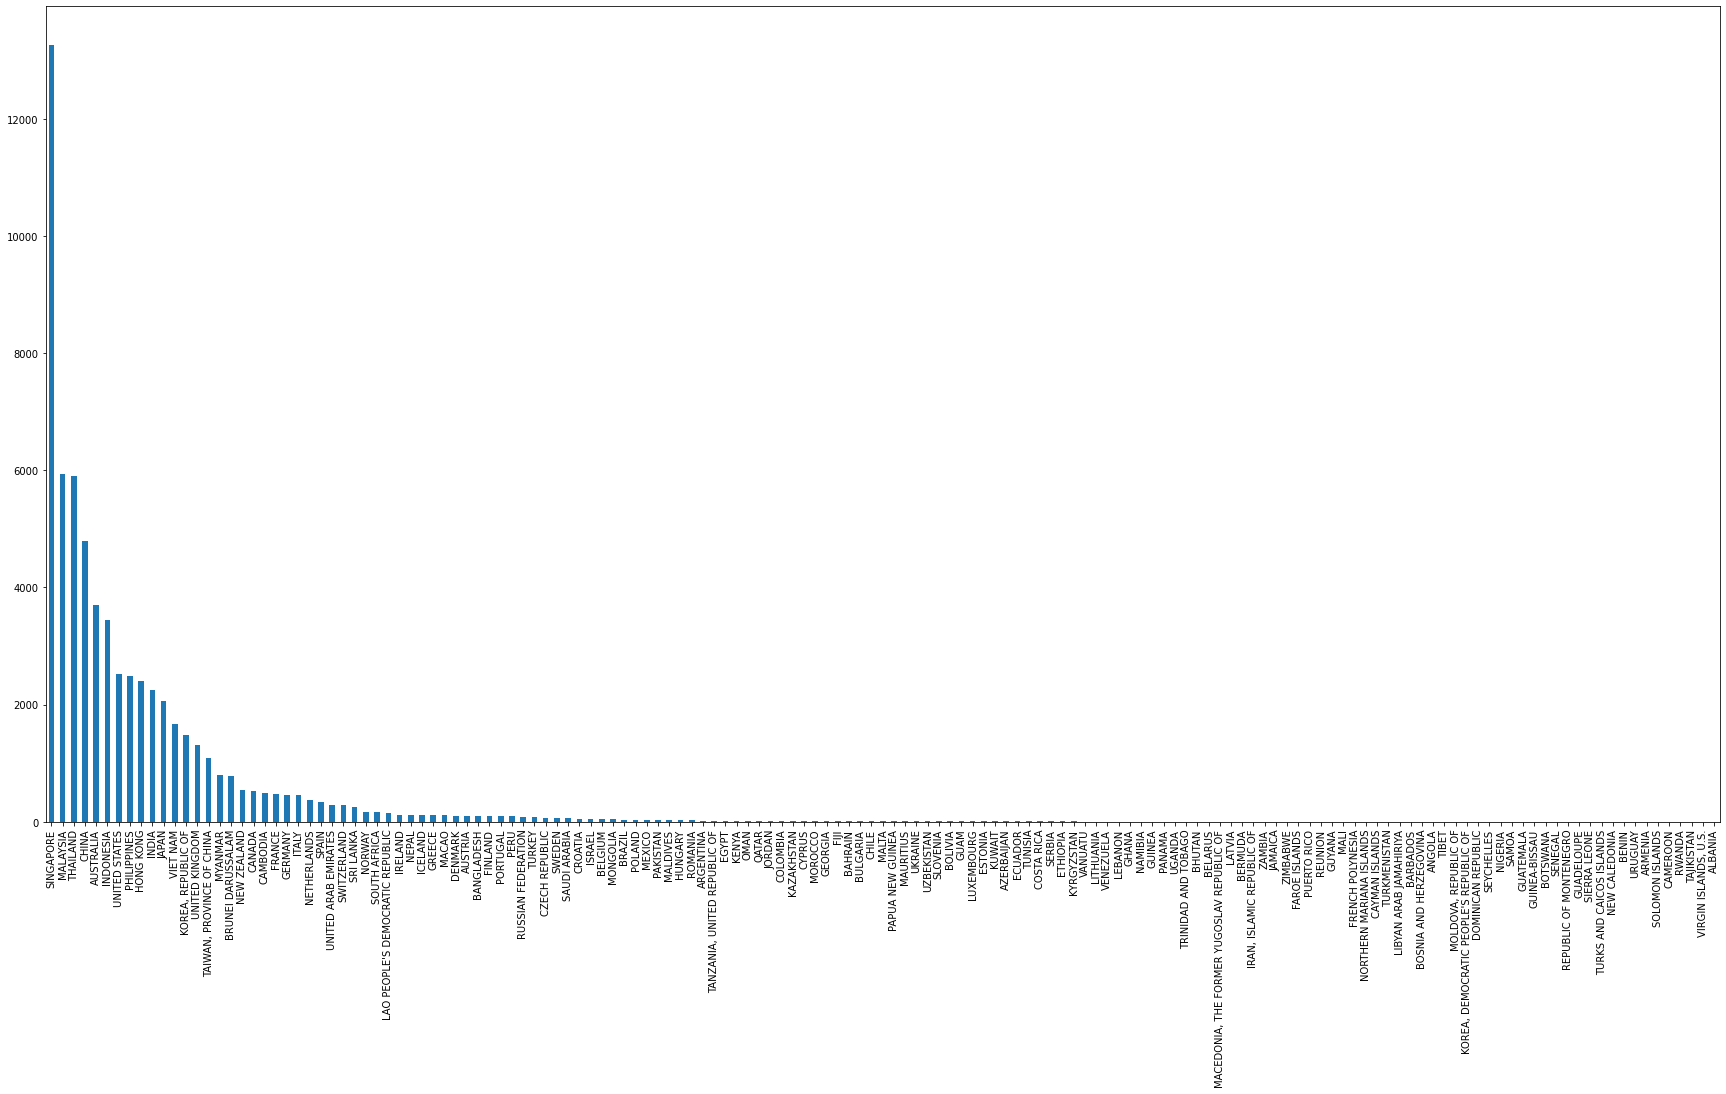

In [16]:
df['Destination'].value_counts().plot.bar(figsize=(30,15))

**INFERENCES:**
The destination of singapore has more claim.

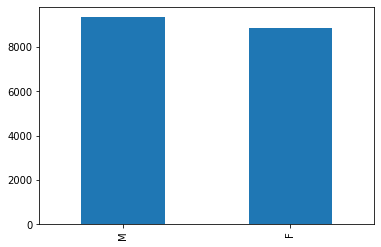

In [17]:
df['Gender'].value_counts().plot.bar()

**INFERENCES:**
Males claiming for insurances slightly more than female.

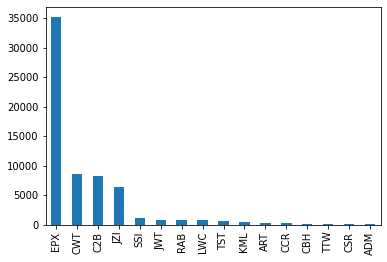

In [ ]:
df['Agency'].value_counts().plot.bar()

**INFERENCES:**
EPX agencies claims mostly.

In [18]:
#Class distribution in target variable
df.groupby('Claim').count()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
Claim,,,,,,,,,,
No,62399,62399,62399,62399,62399,62399,62399,62399,17580,62399
Yes,927,927,927,927,927,927,927,927,639,927


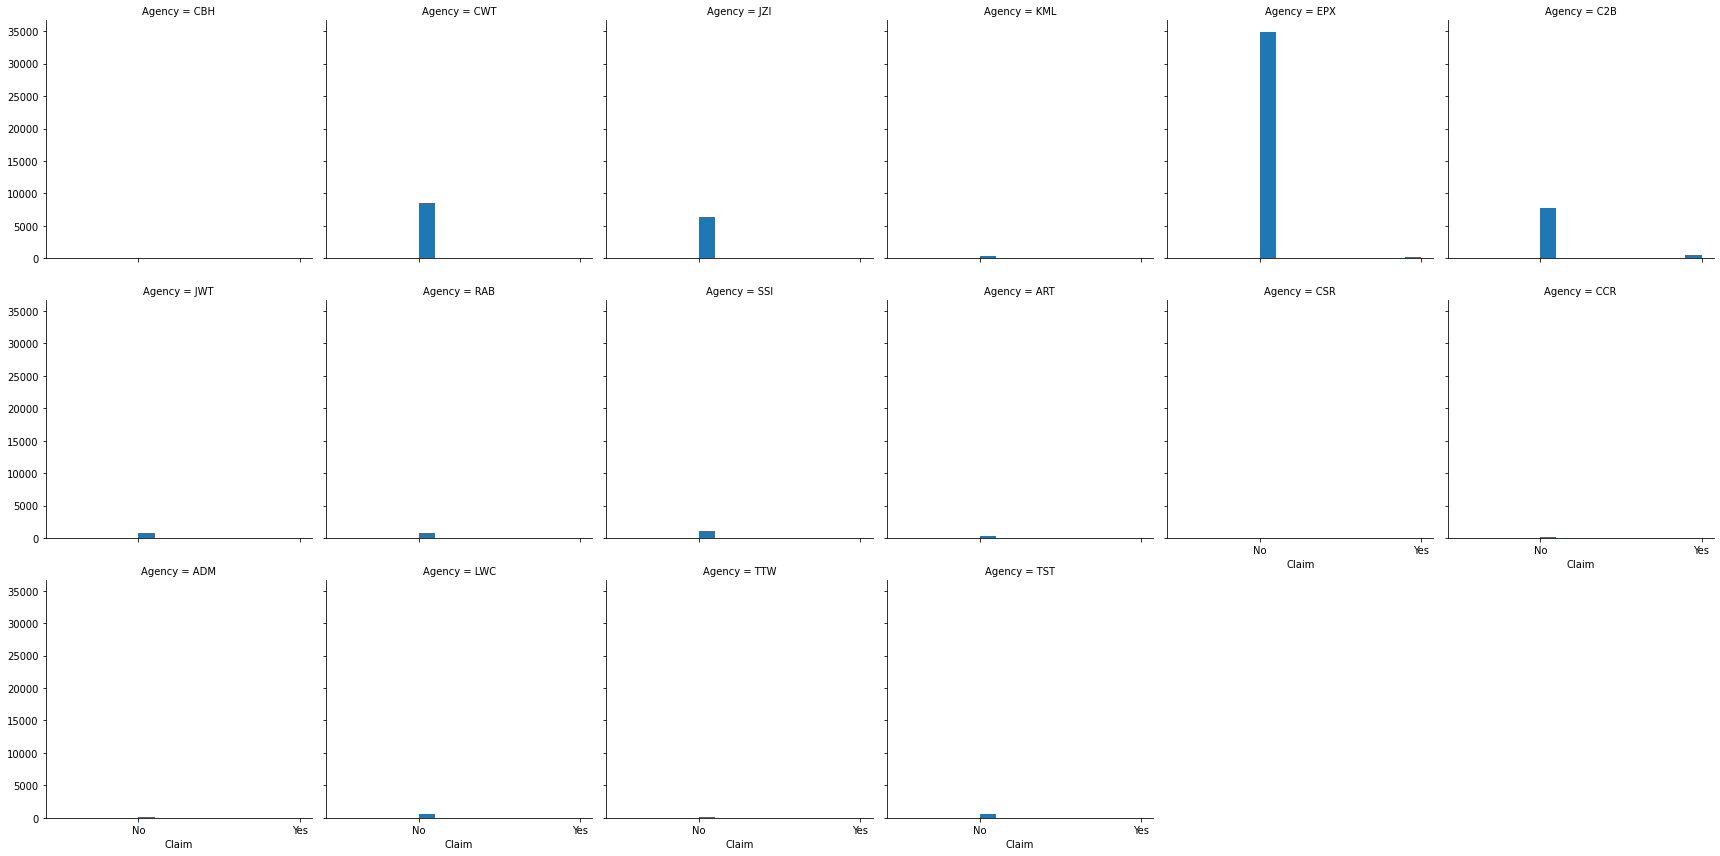

In [21]:
#Bivariate Analysis
import seaborn as sns
fn =sns.FacetGrid(df,col="Agency", col_wrap=6, height=4,aspect=1)
fn = fn.map(plt.hist,"Claim")

**INFERENCES:**
1. All the agencies reject majority of claims except c2b.

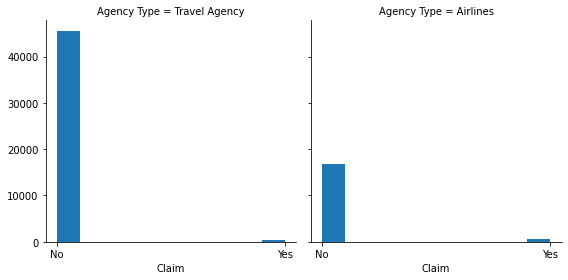

In [22]:
fn =sns.FacetGrid(df,col="Agency Type", col_wrap=2, height=4,aspect=1)
fn = fn.map(plt.hist,"Claim")

**INFERENCES:**
Airlines agency accept more yes as compared to travel agency.

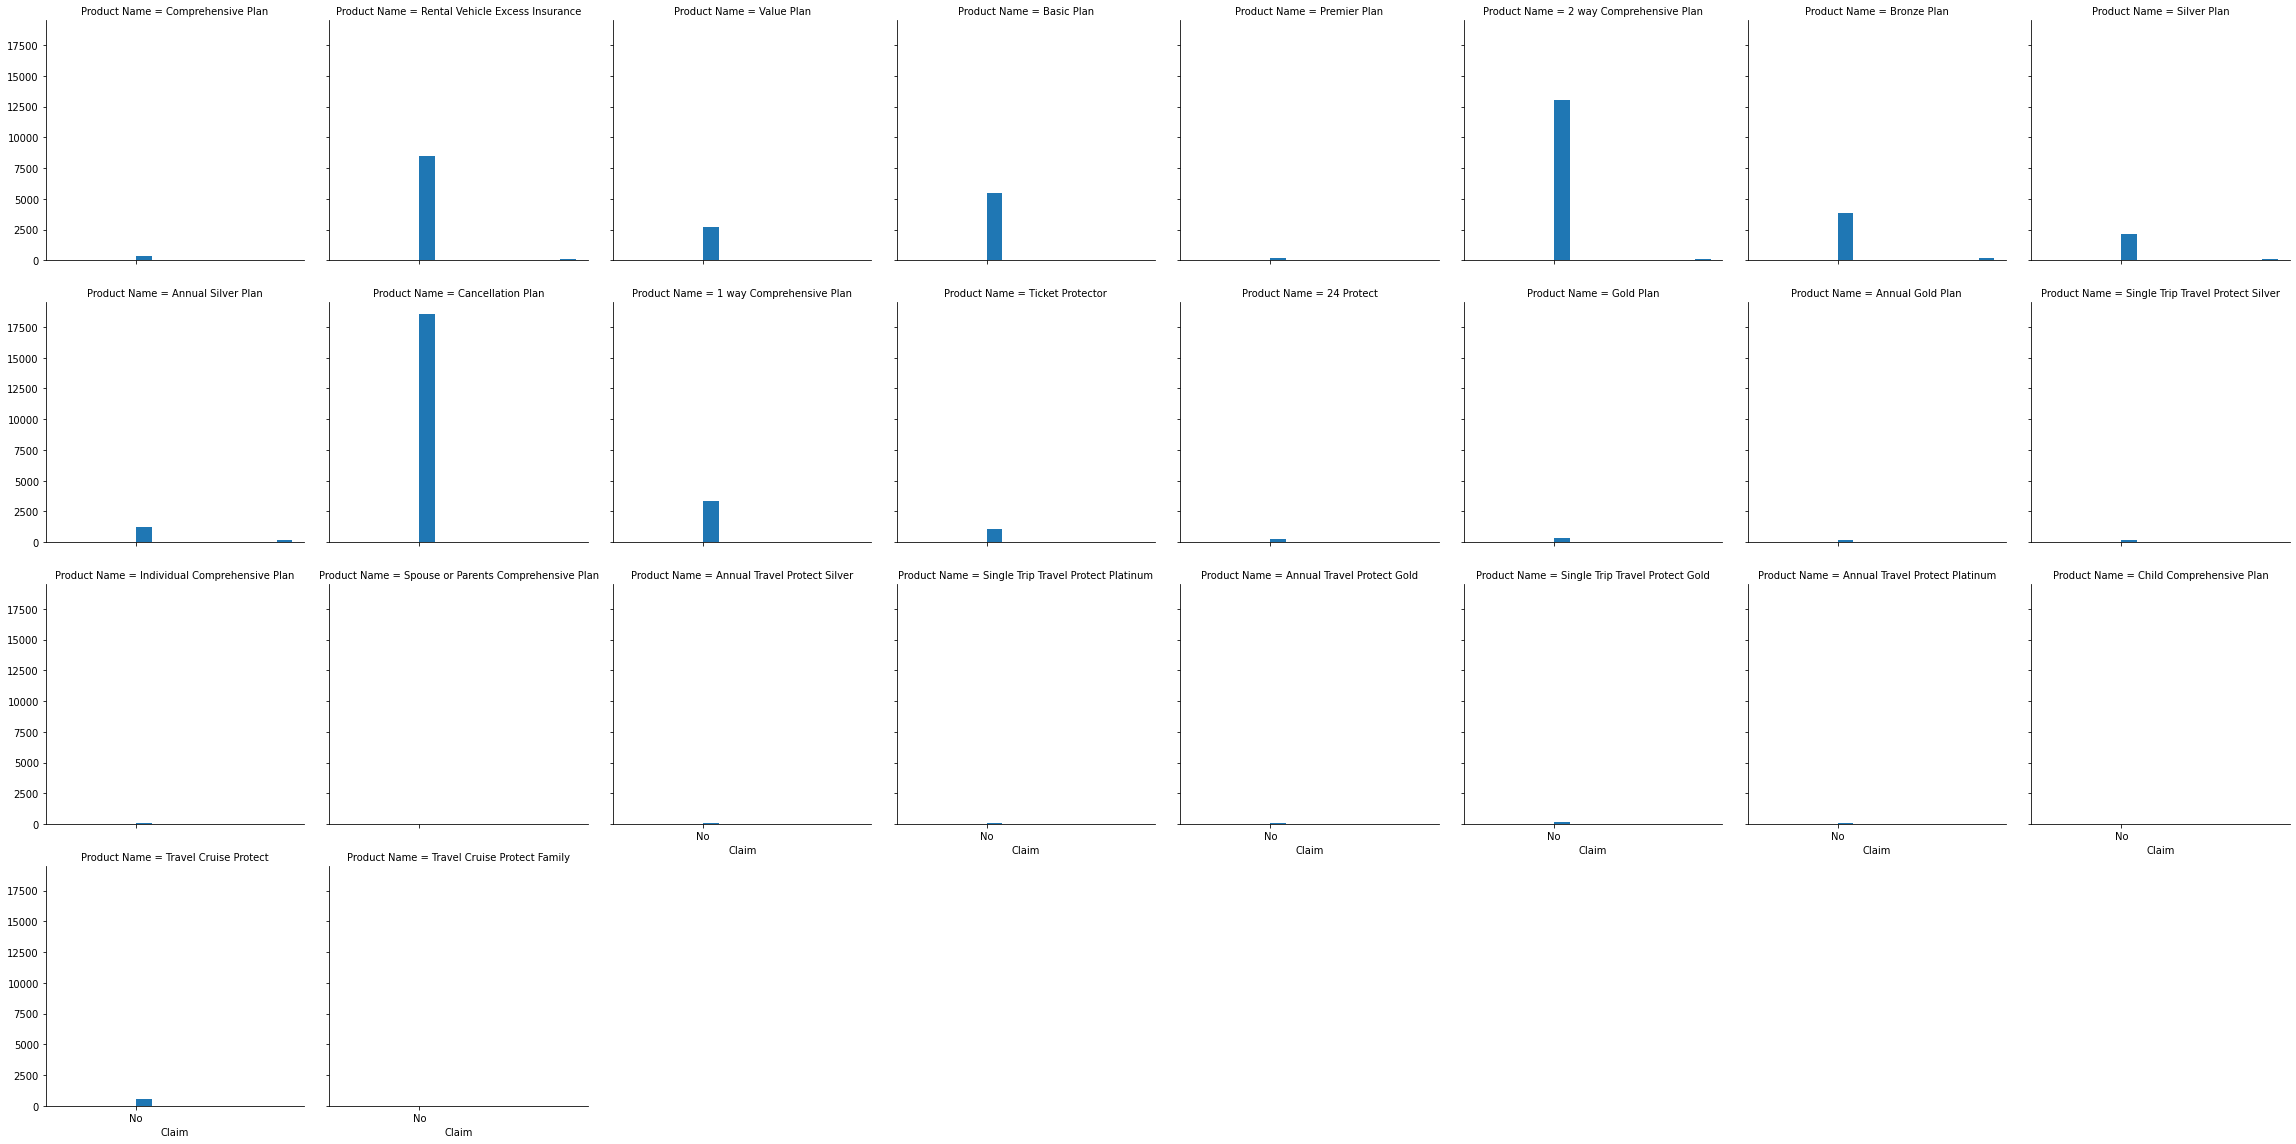

In [24]:
fn =sns.FacetGrid(df,col="Product Name", col_wrap=8, height=4,aspect=1)
fn = fn.map(plt.hist,"Claim")

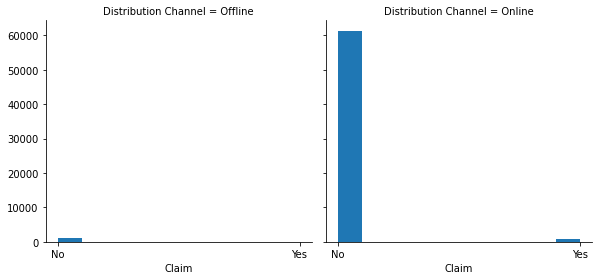

In [25]:
fn =sns.FacetGrid(df,col="Distribution Channel", col_wrap=6, height=4,aspect=1)
fn = fn.map(plt.hist,"Claim")

**INFERENCES:**
1. Online distribution channel there are few claim that accept yes.
2. Offline distribution channel there is less claim that are accept no.

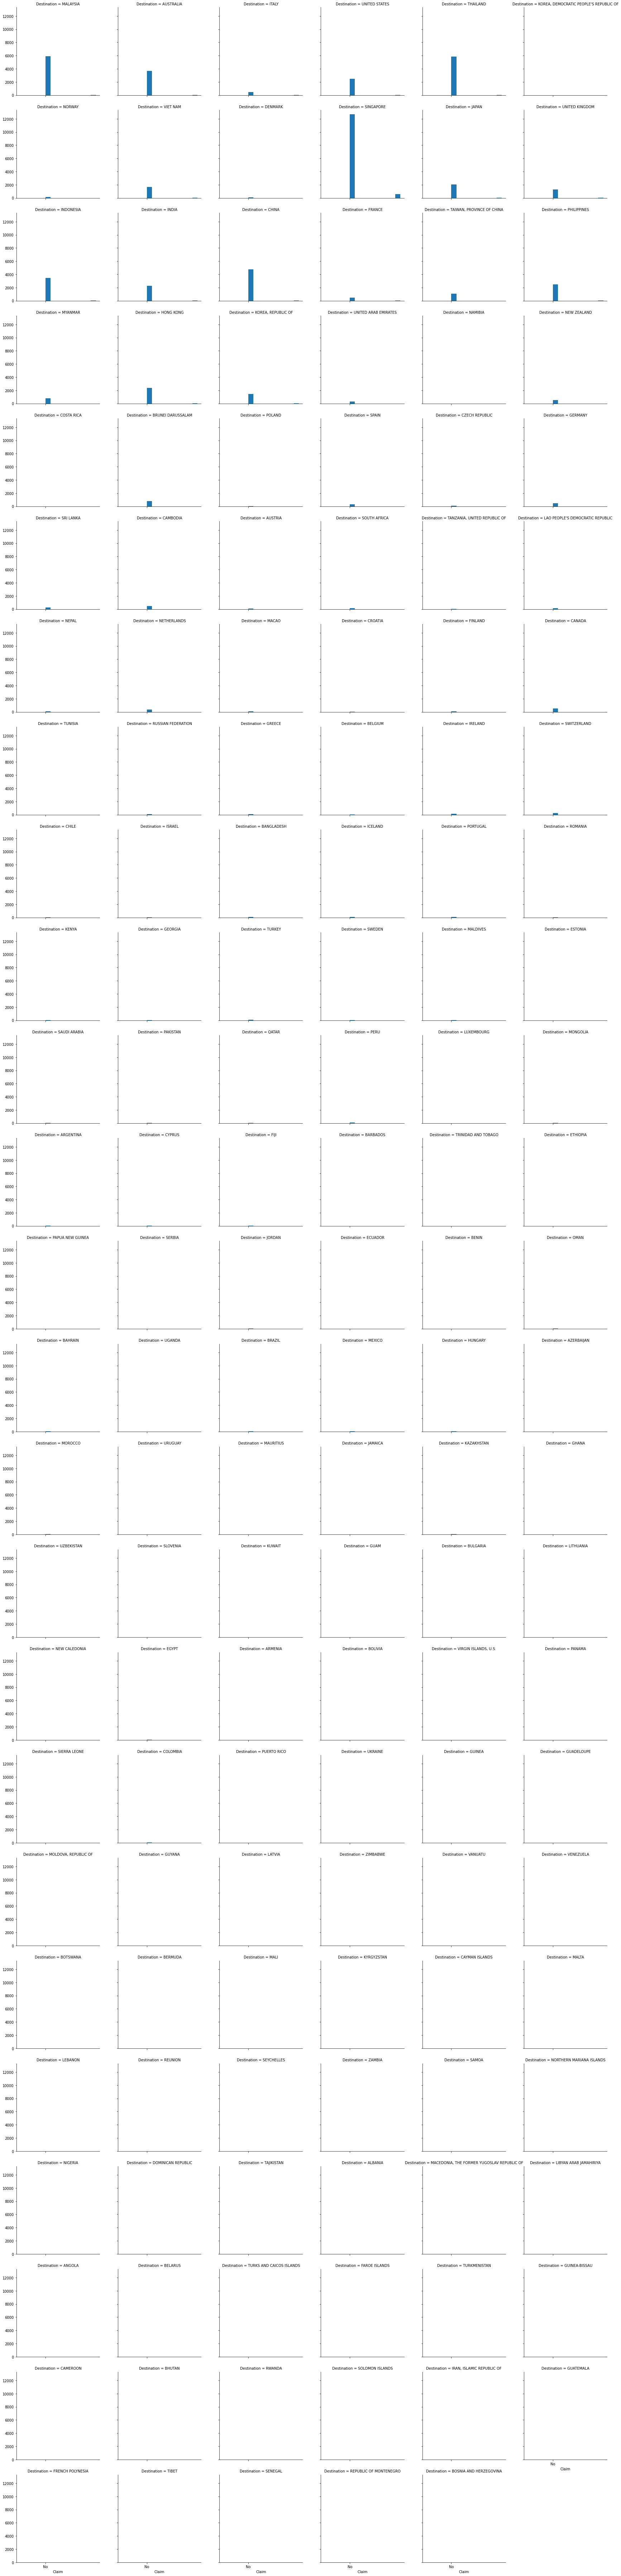

In [27]:
fn =sns.FacetGrid(df,col="Destination", col_wrap=6, height=4,aspect=1)
fn = fn.map(plt.hist,"Claim")

**INFERENCES:**
Agencies in singapore recorded most amount of claim rejectance.

**2. Identify outliers, missing values if any.**

In [28]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [30]:
for i in a:                          #check skewness
  print(str(i)+' : '+str(df[i].skew()))

Duration : 23.179616864234475
Net Sales : 3.272372822599944
Commision (in value) : 4.032268514691959
Age : 2.987709841829195


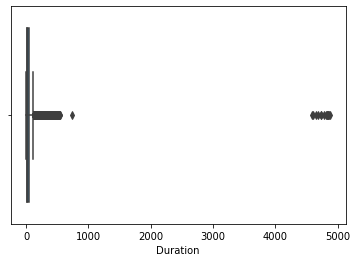

In [31]:
sns.boxplot(x=df['Duration'])

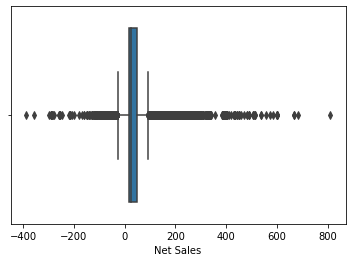

In [32]:
sns.boxplot(x=df['Net Sales'])

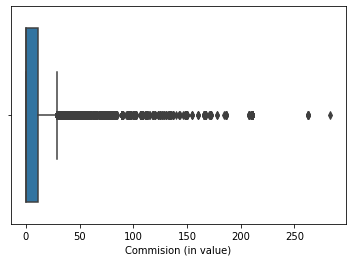

In [33]:
sns.boxplot(x=df['Commision (in value)'])

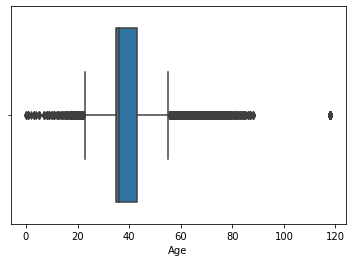

In [34]:
sns.boxplot(x=df['Age'])

In [45]:
#Handling outlier
import numpy as np
for i in a:
  lower_cutoff = df[i].quantile(0.05)
  upper_cutoff = df[i].quantile(0.95)
  df[i] = np.where(df[i] < lower_cutoff,lower_cutoff,df[i])
  df[i] = np.where(df[i] > upper_cutoff, upper_cutoff,df[i])
  print('After Outlier handling, '+str(i)+' : '+str(df[i].skew()))

After Outlier handling, Duration : 1.308075989230988
After Outlier handling, Net Sales : 1.094847740919433
After Outlier handling, Commision (in value) : 1.6477765758571352
After Outlier handling, Age : 0.9050904061711063


In [47]:
Q1=df.quantile(0.1)
Q3=df.quantile(0.9)
IQR=Q3-Q1
df2= ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).sum()
df2

Age                     0
Agency                  0
Agency Type             0
Claim                   0
Commision (in value)    0
Destination             0
Distribution Channel    0
Duration                0
Gender                  0
Net Sales               0
Product Name            0
dtype: int64

In [51]:
#checking missing values
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  43484
Age                         0
dtype: int64

In [56]:
#Gender has more missing values and also there is no need of gender in predicting whether the insurance claims are rejected or accepted
#so, we can drop gender column from dataset
df = df.drop(columns = 'Gender')

In [57]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

**3. Dervie correlation patterns of each independent variable with dependent variable.**

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = pd.DataFrame()
df1['Claim'] = le.fit_transform(df['Claim'])
df1.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [62]:
df=df.drop(columns='Claim')
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age'],
      dtype='object')

In [65]:
df2 = df.copy()
df2.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,-19.8,11.88,41


In [67]:
cat_var = list(set(b)-set(['Gender' , 'Claim']))
cat_var

['Agency Type',
 'Product Name',
 'Agency',
 'Destination',
 'Distribution Channel']

In [68]:
corr = df2.corr()
corr.head()

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.429235,0.344772,0.002468
Net Sales,0.429235,1.000000,0.651315,0.037756
Commision (in value),0.344772,0.651315,1.000000,0.118348
Age,0.002468,0.037756,0.118348,1.000000


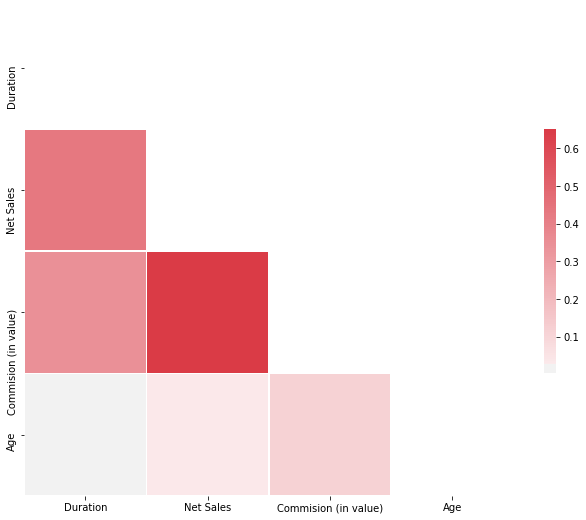

In [75]:
m = np.zeros_like(corr, dtype=np.bool)
m[np.triu_indices_from(m)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

svm = sns.heatmap(corr, mask=m, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**4. Using Target Variable - Claim, Identify class imbalance & explore methods to handle it**

In [76]:
#Class imbalance
print(df1['Claim'].value_counts())
lbl_1,lbl_0 = df1['Claim'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/df1['Claim'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/df1['Claim'].count()))

0    62399
1      927
Name: Claim, dtype: int64
Label 1 class %age: 98.53614629062312
Label 0 class %age: 1.4638537093768753
